In [2]:
import pandas as pd
from pandas.api.types import CategoricalDtype
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import matplotlib.cm as cm
import numpy as np
import seaborn as sns
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
import scipy.cluster.hierarchy as shc
from sklearn import cluster, datasets, mixture, metrics
from sklearn.decomposition import PCA
from yellowbrick.cluster import SilhouetteVisualizer

%matplotlib inline

In [3]:
coumn_names = ['age', 'sex', 'chest_pain', 'resting_blood_pressure', 'cholestoral', 'fasting_blood_sugar', 'restecg', 'max_heartrate', 'exang', 'st_depression', 'slope', 'ca', 'thal', 'num']

cleveland_data = pd.read_csv('G:\My Drive\FH_Technikum\MSC\Semester_2_SS2022\DAS\DataVisualization\Data\HeartDisease\processed.cleveland.data')
cleveland_data.columns = coumn_names
cleveland_data['source'] = 'cleveland'
switzerland_data = pd.read_csv('G:\My Drive\FH_Technikum\MSC\Semester_2_SS2022\DAS\DataVisualization\Data\HeartDisease\processed.switzerland.data')
switzerland_data.columns = coumn_names
switzerland_data['source'] = 'switzerland'
va_data = pd.read_csv('G:\My Drive\FH_Technikum\MSC\Semester_2_SS2022\DAS\DataVisualization\Data\HeartDisease\processed.va.data')
va_data.columns = coumn_names
va_data['source'] = 'va'
hungarian_data = pd.read_csv('G:\My Drive\FH_Technikum\MSC\Semester_2_SS2022\DAS\DataVisualization\Data\HeartDisease\processed.hungarian.data')
hungarian_data.columns = coumn_names
hungarian_data['source'] = 'hungary'

frames = [cleveland_data, switzerland_data, va_data, hungarian_data]
data = pd.concat(frames)

data = data.replace('?', np.nan)

data.age = data.age.astype('int')

data = data.dropna()
data.sex = data.sex.astype('int')
data.sex = data.sex.apply(lambda value: 'male' if value == 1 else 'female')
data.sex = pd.Categorical(data.sex, categories=['male', 'female'])

data.chest_pain = data.chest_pain.astype('int')
data.chest_pain = pd.Categorical(data.chest_pain, categories=[1, 2, 3, 4])
data.chest_pain = data.chest_pain.apply(lambda value: 'typical angina' if value == 1 else 'atypical angina' if value != 3 else 'non-anginal pain' if value != 4 else 'asymptomatic')
data.chest_pain = pd.Categorical(data.chest_pain, categories=['typical angina', 'atypical angina', 'non-anginal pain', 'asymptomatic'])
data.resting_blood_pressure = data.resting_blood_pressure.astype('float64')
data.cholestoral = data.cholestoral.astype('float64')
data.fasting_blood_sugar = data.fasting_blood_sugar.astype('float64')
data.restecg = data.restecg.astype('int')
data.restecg = data.restecg.apply(lambda value: 'normal' if value == 0 else 'ST-T wave abnormality' if value != 2 else 'left ventricular hypertrophy')
data.restecg = pd.Categorical(data.restecg, categories=['normal', 'ST-T wave abnormality', 'left ventricular hypertrophy'])
data.max_heartrate = data.max_heartrate.astype('float64')
data.exang = data.exang.astype('int')
data.exang = data.exang.apply(lambda value: 'yes' if value == 1 else 'no')
data.exang = pd.Categorical(data.exang, categories=['yes', 'no'])
data.st_depression = data.st_depression.astype('float64')
data.slope = data.slope.astype('int')
data.slope = data.slope.apply(lambda value: 'upsloping' if value == 1 else 'flat' if value != 3 else 'downsloping')
data.slope = pd.Categorical(data.slope, categories=['upsloping', 'flat', 'downsloping'])
data.ca = data.ca.astype('float')
data.ca = data.ca.astype('int')
data.thal = data.thal.astype('float')
data.thal = data.thal.astype('int')
data.thal = data.thal.apply(lambda value: 'normal' if value == 3 else 'fixed defect' if value != 7 else 'reversable defect')
data.thal = pd.Categorical(data.thal, categories=['normal', 'fixed defect', 'reversable defect'])
data.source = pd.Categorical(data.source, categories=['cleveland', 'va', 'hungary', 'switzerland'])
data.fasting_blood_sugar = data.fasting_blood_sugar.astype('int')
data.fasting_blood_sugar = data.fasting_blood_sugar.apply(lambda value: 'true' if value == 1 else 'false')
data.fasting_blood_sugar = pd.Categorical(data.fasting_blood_sugar, categories=['true', 'false'])

selected_features = data[['resting_blood_pressure', 'age', 'cholestoral']]

selected_features.describe()


,resting_blood_pressure,age,cholestoral
count,298.000000,298.000000,298.000000
mean,131.671141,54.493289,246.832215
std,17.760829,9.032021,52.614845
min,94.000000,29.000000,100.000000
25%,120.000000,48.000000,211.000000
50%,130.000000,56.000000,242.500000
75%,140.000000,61.000000,275.750000
max,200.000000,77.000000,564.000000


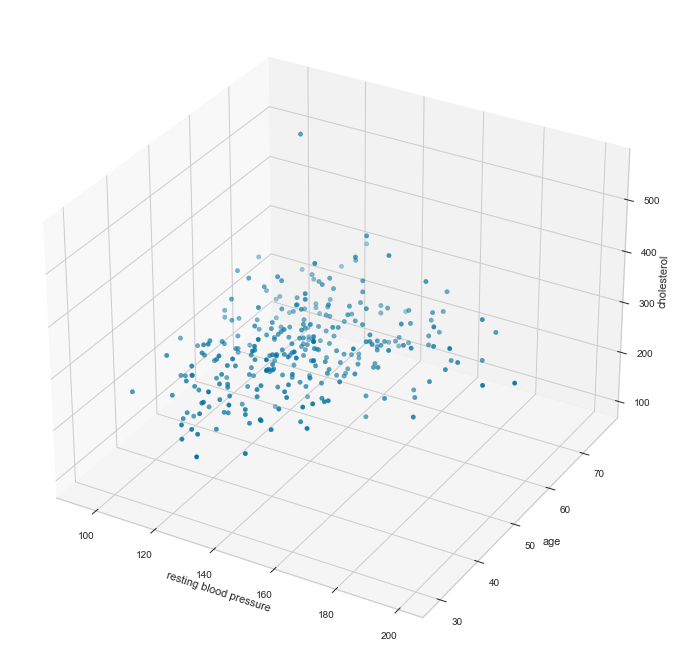

In [4]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('resting blood pressure')
ax.set_ylabel('age')
ax.set_zlabel('cholesterol')
ax.scatter(xs='resting_blood_pressure', ys='age', zs='cholestoral', data=selected_features, )
plt.show()

Reducing dimensionality, so it can be plotted more easily:

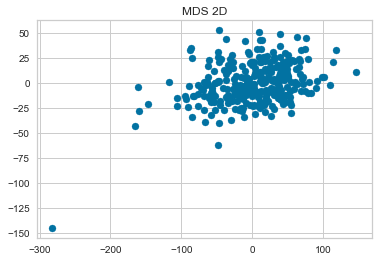

In [5]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, max_iter=100, dissimilarity='euclidean', n_jobs=2, n_init=2)
mds_transformed = mds.fit_transform(selected_features)
mds_transformed_df = pd.DataFrame(mds_transformed)

fig_mds = plt.figure()

ax_mds = fig_mds.add_subplot()
plt.scatter(mds_transformed_df[0], mds_transformed_df[1])
plt.title('MDS 2D')
plt.show()

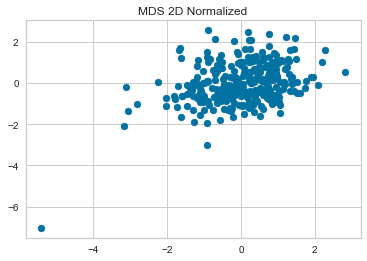

In [6]:
n = StandardScaler().fit_transform(mds_transformed)
scaled_features_transformed = pd.DataFrame(n, index=mds_transformed_df.index, columns=mds_transformed_df.columns)

fig_mds = plt.figure()

ax_mds = fig_mds.add_subplot()
plt.scatter(scaled_features_transformed[0], scaled_features_transformed[1])
plt.title('MDS 2D Normalized')
plt.show()

To get consistent and correct results, normalization has to be performed.

In [7]:
scaled_features_df = scaled_features_transformed

# Agglomarative Clustering (Hierarchical)

As with the large dataset, I'll be starting to try agglomarative clustering.

This method builds up a dendogram and uses a distance metric to determin which datapoints should be grouped together. It starts by viewing each datapoint as a separate group and iteratively groups them together (as seen in the dendogram below).

It yielded the following results:

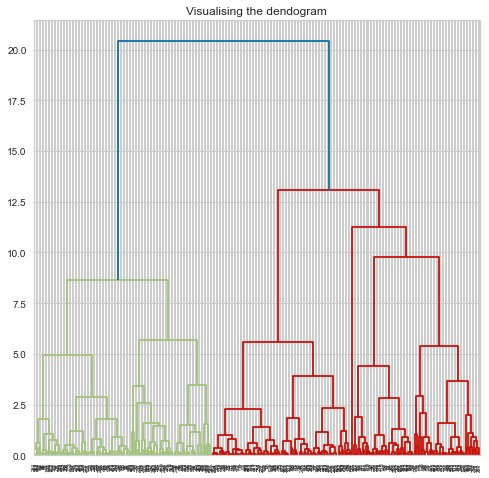

In [8]:
plt.figure(figsize =(8, 8))
plt.title('Visualising the dendogram')
Dendrogram = shc.dendrogram((shc.linkage(scaled_features_df, method ='ward')))

Code samples have been taken from https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

For n_clusters = 2 The average silhouette_score is : 0.3349357107477346
For n_clusters = 3 The average silhouette_score is : 0.2903908518769093
For n_clusters = 4 The average silhouette_score is : 0.29940419568891
For n_clusters = 5 The average silhouette_score is : 0.30633216785582457
For n_clusters = 6 The average silhouette_score is : 0.292460214043766


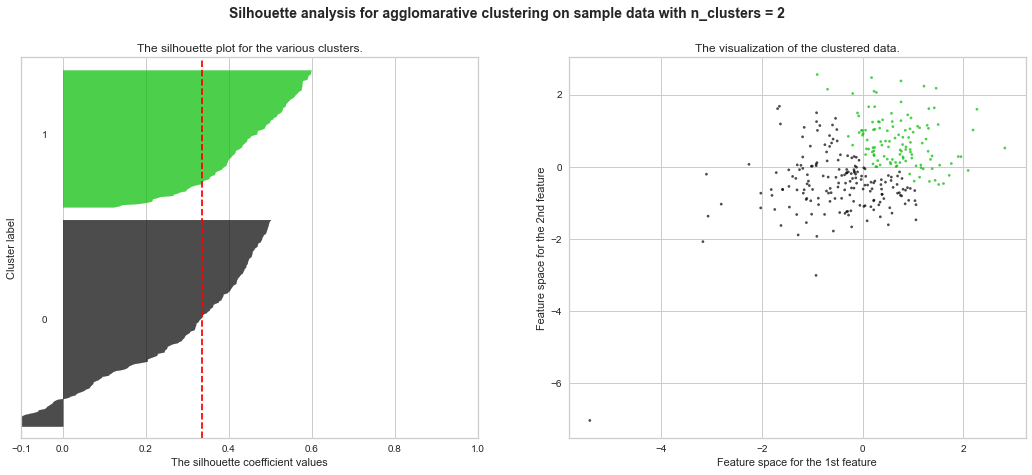

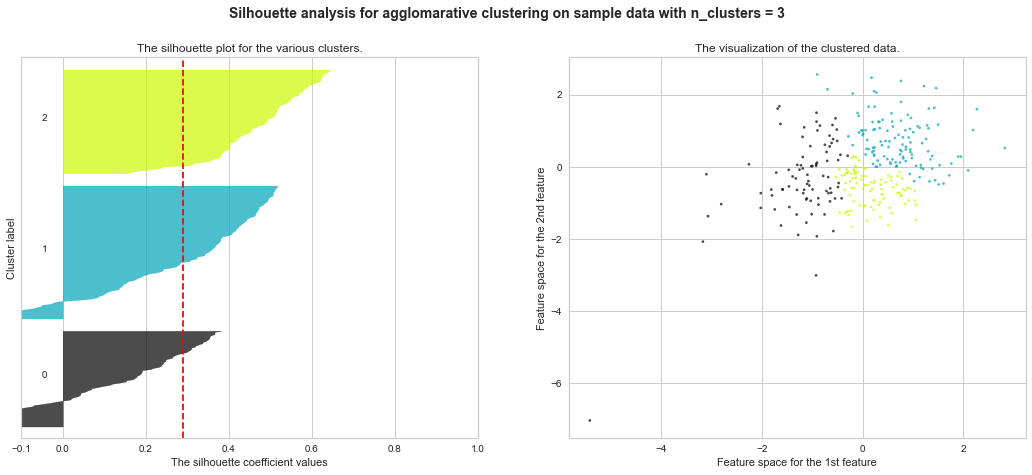

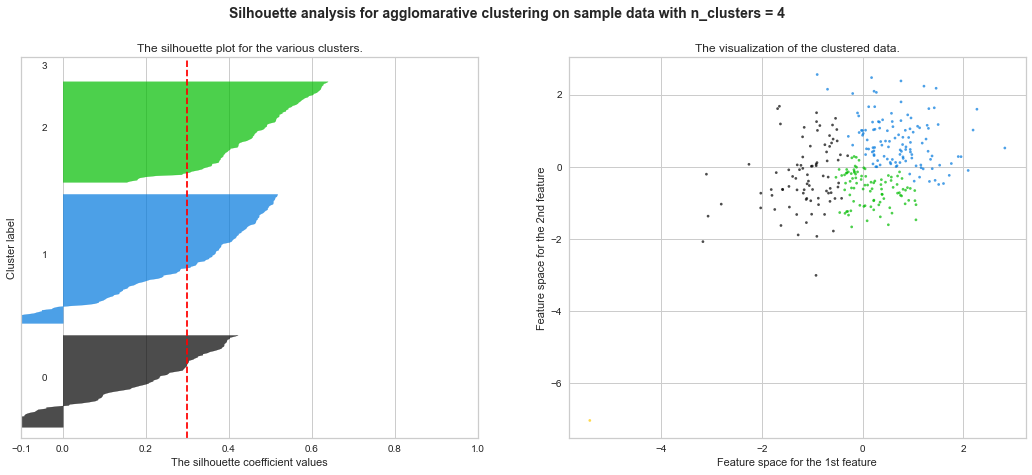

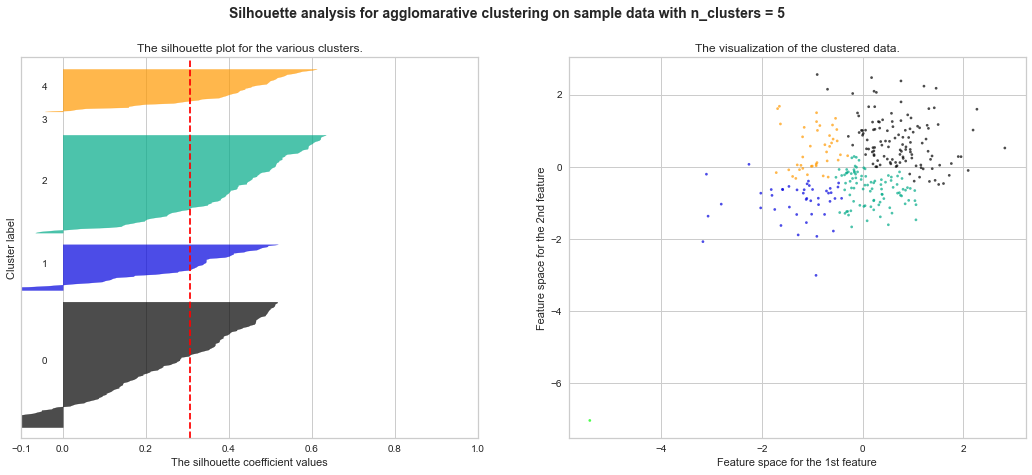

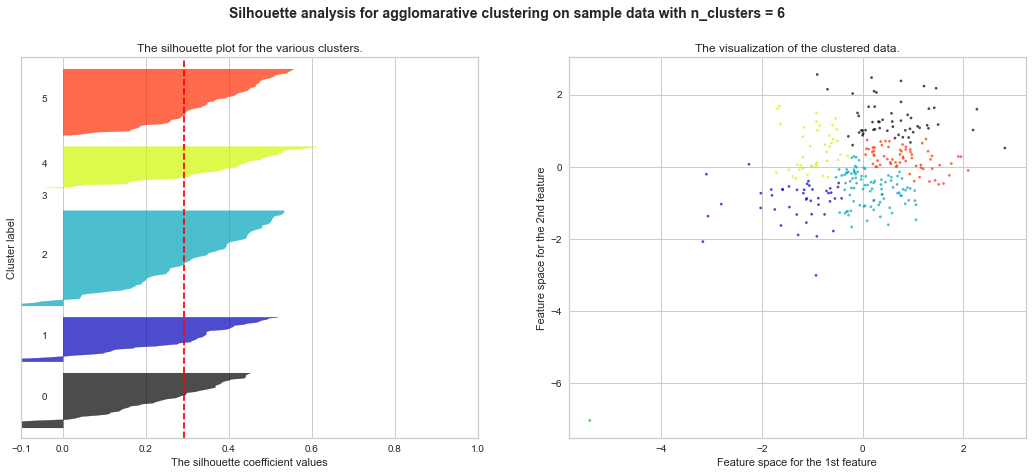

In [9]:
clustersList = [2,3,4,5,6]

for n_clusters in clustersList:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(scaled_features_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = cluster.AgglomerativeClustering(n_clusters = n_clusters)
    cluster_labels = clusterer.fit_predict(scaled_features_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = metrics.silhouette_score(scaled_features_df, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = metrics.silhouette_samples(scaled_features_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        scaled_features_df[0], scaled_features_df[1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for agglomarative clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()


The best average silhouette score is 0.31 with 4 or 5 clusters. Overall, only very low average silhouette scores could be achieved by the agglomarative clustering method. The plots of the silhouette scores show generally low silhouette values (<6). The clustering does not fit well with the geven data.

# Gaussian Mixture (Partitive Clustering)

Since the data is strongly clumped up, I expected not to find a useful difference between the available partitive clustering methods known to me.

As partitive clustering method, it needs a number as the basis for the number of clusters to produce. It is based ona probabilistic model which assumes all the datapoints are created using a gaussian distribution. Datapoints can belong to multiple clusters (probability is provided).

Therefore I chose to try gaussian mixture, which yielded the following results:

For n_clusters = 2 The average silhouette_score is : 0.38226230458474864
For n_clusters = 3 The average silhouette_score is : 0.3460714471944428
For n_clusters = 4 The average silhouette_score is : 0.3149430063495358
For n_clusters = 5 The average silhouette_score is : 0.3407848128635872
For n_clusters = 6 The average silhouette_score is : 0.2979548101523586


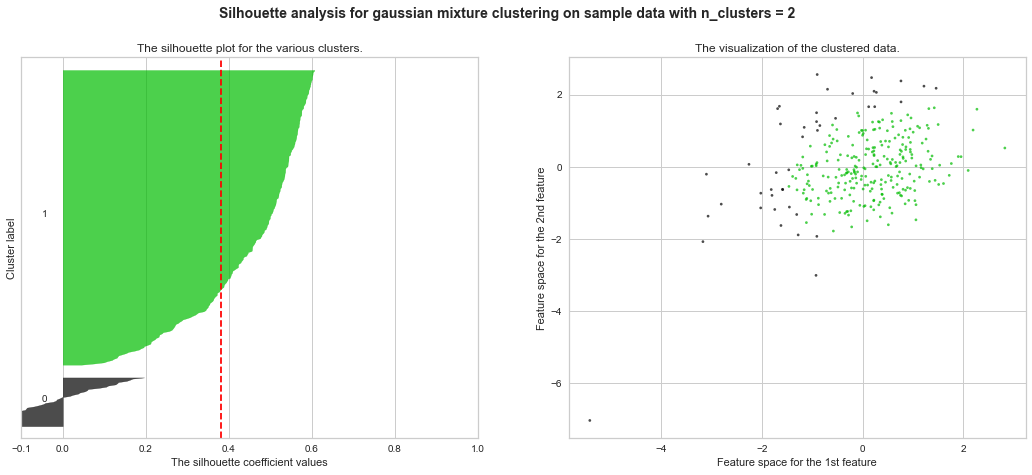

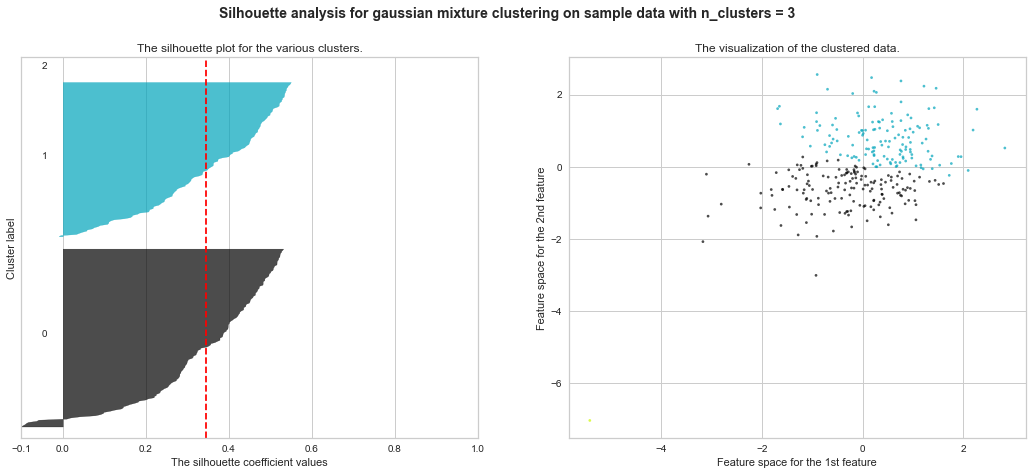

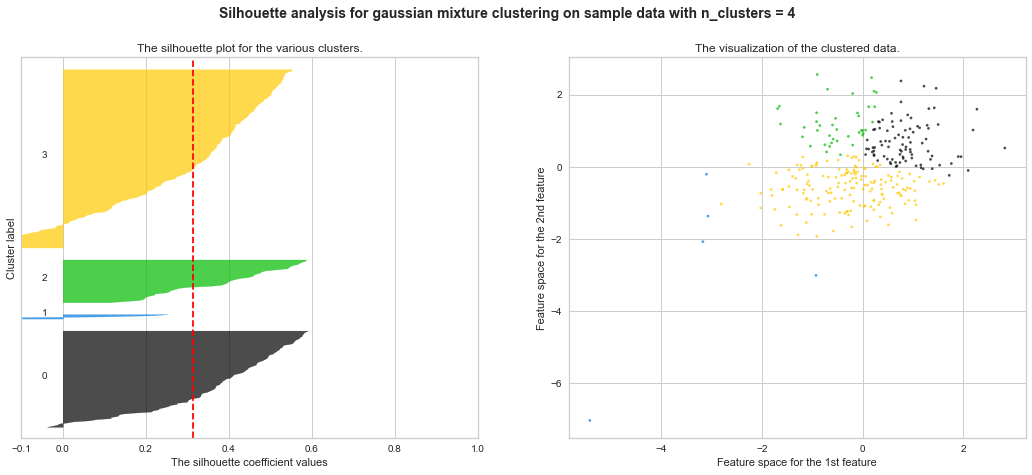

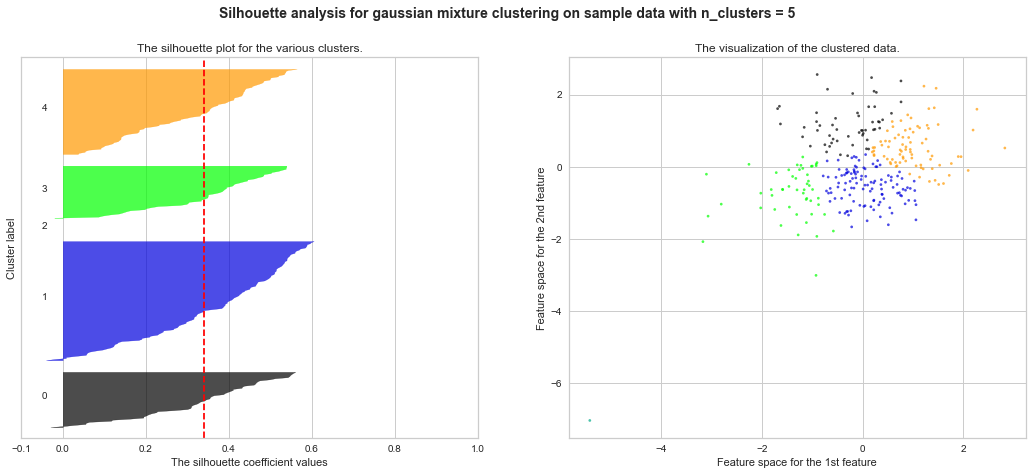

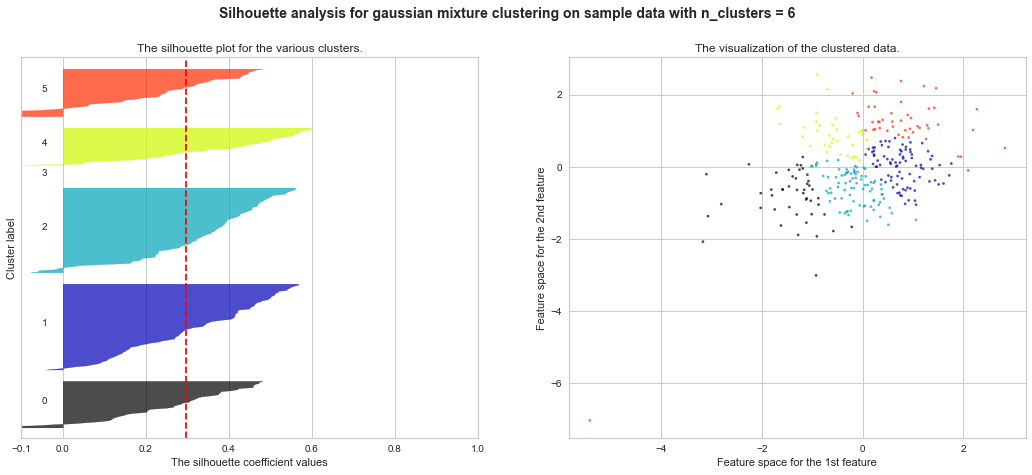

In [10]:
clustersList = [2,3,4,5,6]

for n_clusters in clustersList:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(scaled_features_df) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = mixture.GaussianMixture(n_components = n_clusters)
    cluster_labels = clusterer.fit_predict(scaled_features_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = metrics.silhouette_score(scaled_features_df, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = metrics.silhouette_samples(scaled_features_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        scaled_features_df[0], scaled_features_df[1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for gaussian mixture clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()

Using the Gaussian Blur method, the silhouette values did not increase compared to the agglomarative clustering approach. Therefore, this clustering method does not work well with given data either.

# DBSCAN

Next, I was interested in how the result would look like when using DBSCAN. It clusters by analyzing the density of the datapoints and clustering dens "areas" to one cluster.

For n_clusters = 2 The average silhouette_score is : 0.6829579230672406
For n_clusters = 2 The average silhouette_score is : 0.5944447018720315
For n_clusters = 2 The average silhouette_score is : 0.49628630868948675
For n_clusters = 12 The average silhouette_score is : -0.2036616167484857


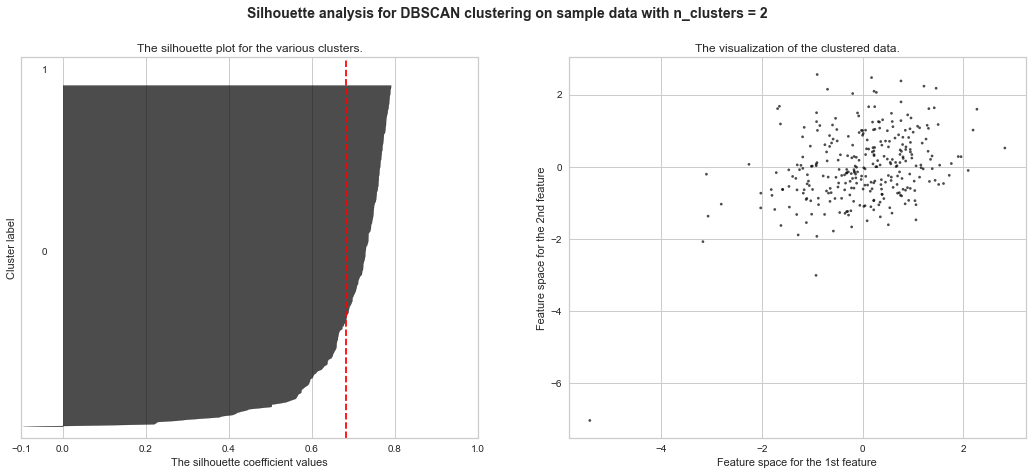

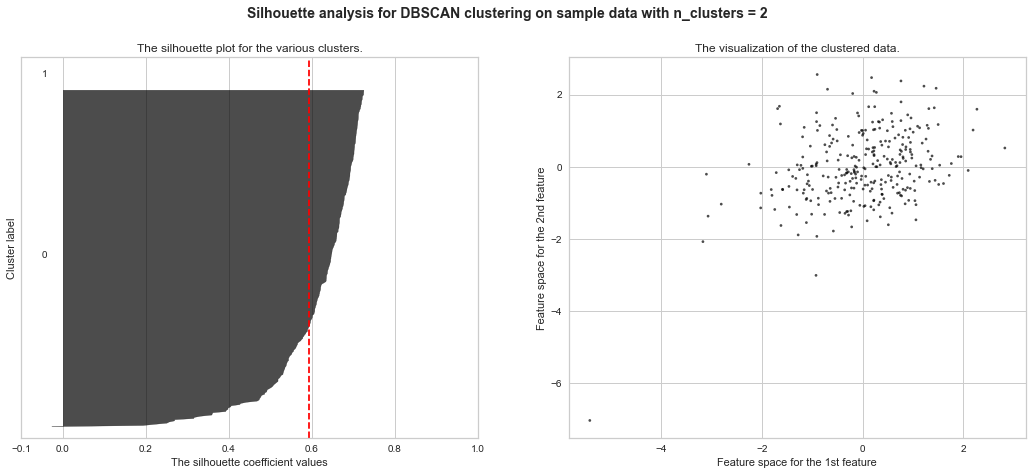

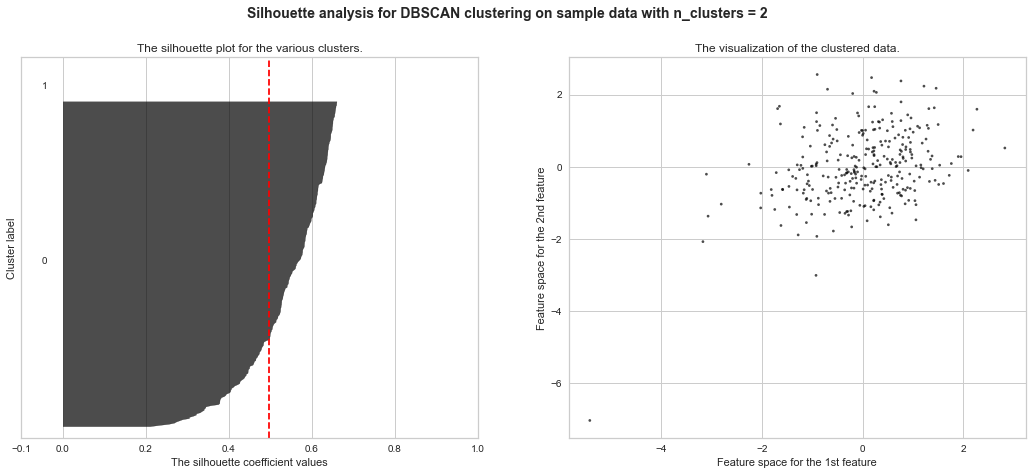

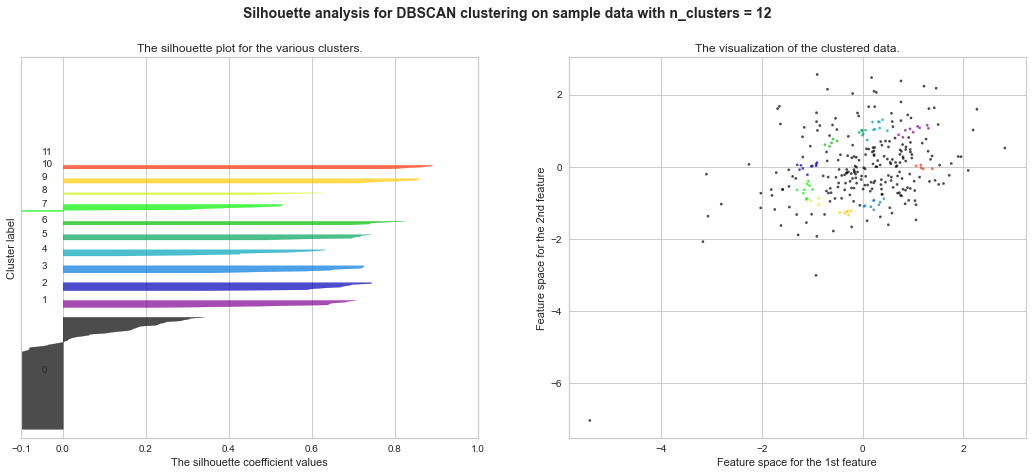

In [11]:
epsList = [1, 0.8, 0.5, 0.2]

for eps in epsList:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = cluster.DBSCAN(algorithm='kd_tree', min_samples=5, eps=eps)
    cluster_labels = clusterer.fit_predict(scaled_features_df)
    _, counts = np.unique(cluster_labels, return_counts=True)
    n_clusters = len(counts)

    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(scaled_features_df) + (n_clusters + 1) * 10])

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = metrics.silhouette_score(scaled_features_df, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = metrics.silhouette_samples(scaled_features_df, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        scaled_features_df[0], scaled_features_df[1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for DBSCAN clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
        fontweight="bold",
    )

plt.show()


    # db = cluster.DBSCAN(algorithm='kd_tree', min_samples=5, eps=eps)
    # clustering = db.fit_predict(scaled_features_df)
    # # Visualizing the clustering
    # plt.figure(figsize =(10,10))
    # plt.title('maximum distance: ' + str(eps))
    # plt.scatter(scaled_features_df['wage per hour'], scaled_features_df['age'], 
    #         c = clustering, cmap ='rainbow')
    # plt.show()

As with the large dataset, DBSCAN reaveals the best result when there is essentially one big cluster over the majority of the datapoints. This fits with the observation, that the provided data does not consist of well defined and separate clusters. This is also clearly visible in all the plots.